### PCA

#### PCA scratch

In [19]:
# rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# print(X.shape)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def PCA(X, n_components=1):
    #1. center the data (center the data, not features, thus axis=0)
    mean = np.mean(X, axis=0)
    X = (X - mean)
    
    print(n_components)

    #2. find covariance
    #the reason we can X.T @ X right away since we already 
    #center the data)
    #did not really use this variable
    cov = (X.T @ X) / (X.shape[0] - 1)
    
    #3. Then simply find the eigenvalues using np.linalg.eig 
    #by inputting the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
     
    print("Eigenvalue shape: ", eigenvalues.shape) #(n, )
    print("Eigenvectors shape: ", eigenvectors.shape) #(n, n)

    #4. Your n'th principal components will be your first n'th eigenvectors with highest eigenvalues
    ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        #get the first nth components
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

    print("eigen: ", eigenvalues)
    print("sum: ", np.sum(eigenvalues))
    print("np.cumsum: ", np.cumsum(eigenvalues))
    print("eigenvector shape: ", eigenvectors.shape)
    #define how much variance is gained after n' component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #during projection, eigenvectors mush be arranged in columns
    projected_X = X @ eigenvectors
    
    #print all info
    print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues)
    print("Eigenvectors (column-wise): ", eigenvectors)
    print("Mean: ", mean)
    print("Old X shape: ", X.shape)
    print("Projected X shape: ", projected_X.shape)
    
    #return only n_components eigenvalues and vectors
    return eigenvalues, eigenvectors, mean, projected_X

#copy code from the lectures to plot the eigen values and vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


##### Main Code

2
Eigenvalue shape:  (2,)
Eigenvectors shape:  (2, 2)
eigen:  [0.7625315 0.0184779]
sum:  0.7810093963961743
np.cumsum:  [0.7625315 0.7810094]
eigenvector shape:  (2, 2)
Variance explained_ratio:  [0.97634101 1.        ]
Eigenvalues:  [0.7625315 0.0184779]
Eigenvectors (column-wise):  [[-0.94446029  0.32862557]
 [-0.32862557 -0.94446029]]
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (200, 2)
Projected X shape:  (200, 2)


(-2.72728878056785,
 2.9144798642810295,
 -0.428095936878651,
 0.33954864905102083)

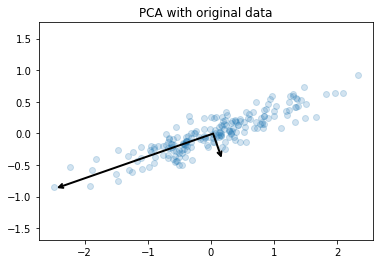

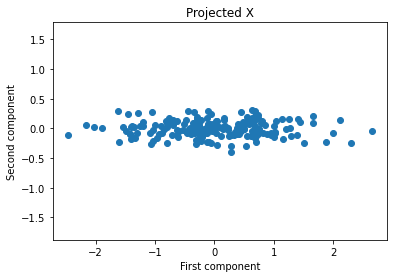

In [21]:
#main code
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

#looking at the original graph with the loadings
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#.T so each row is eigenvector, so we can loop
for length, vector in zip(eigenvalues, eigenvectors.T):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    #https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
    v = vector * 3 *  np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal')
plt.title('PCA with original data')

#projection
#you can see that lots of data in the second components is gone
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

#### PCA with Sklearn

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

##### Main Code

In [23]:
#### PCA with Sklearn
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


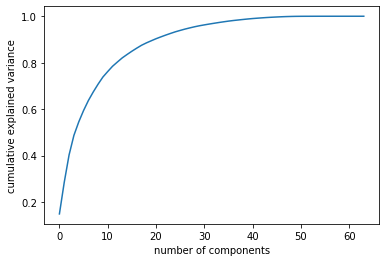

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');